In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

In [3]:
seed = 78456341

In [4]:
data = pd.read_csv('data_SHAP.csv')
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [5]:
sp = RepeatedStratifiedKFold(random_state=seed,n_repeats=3,n_splits=5)

In [13]:
import hyperopt
from hyperopt import hp

In [14]:
def objective(params):
    aucs = []
    for train_index,test_index in sp.split(X,y):
        X_train = X.iloc[train_index,:]
        X_vali = X.iloc[test_index,:]
        y_train = y[train_index]
        y_vali = y[test_index]
        model = SVC(random_state=seed,
                    C=params['C'],
                    gamma=params['gamma'],
                    probability=True)
        model.fit(X_train,y_train)
        pro_vali = model.predict_proba(X_vali)[:,1]
        auc_vali = roc_auc_score(y_vali,pro_vali)
        aucs.append(auc_vali)
    return -np.mean(aucs)

In [15]:
space = {
    'C':hp.uniform('C',0,10),
    'gamma':hp.uniform('gamma',0,10),
}

In [16]:
best_param = hyperopt.fmin(objective,space,hyperopt.tpe.suggest,max_evals=50)

100%|██████████| 50/50 [00:10<00:00,  4.83trial/s, best loss: -1.0]               


In [17]:
best_param

{'C': np.float64(5.661748677701832), 'gamma': np.float64(0.07987478805141812)}

In [6]:
model = SVC(random_state=seed,
            C=5.661748677701832,
            gamma=0.07987478805141812,
            probability=True)
model.fit(X,y)

SVC(C=5.661748677701832, gamma=0.07987478805141812, probability=True,
    random_state=78456341)

In [7]:
def func(X):
    return model.predict_proba(X)[:,1]

In [8]:
explainer = shap.KernelExplainer(func,X)
shap_values = explainer.shap_values(X)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 1920x1440 with 0 Axes>

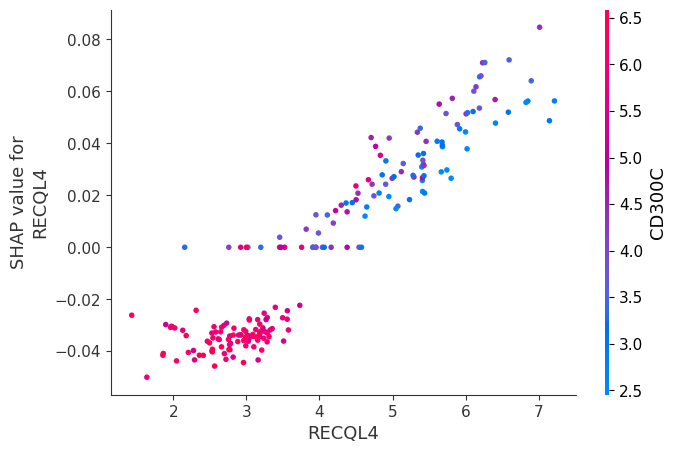

In [21]:
plt.figure(dpi=300)
shap.dependence_plot('RECQL4',shap_values,X,show=False)
plt.savefig('SVM_RECQL4.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

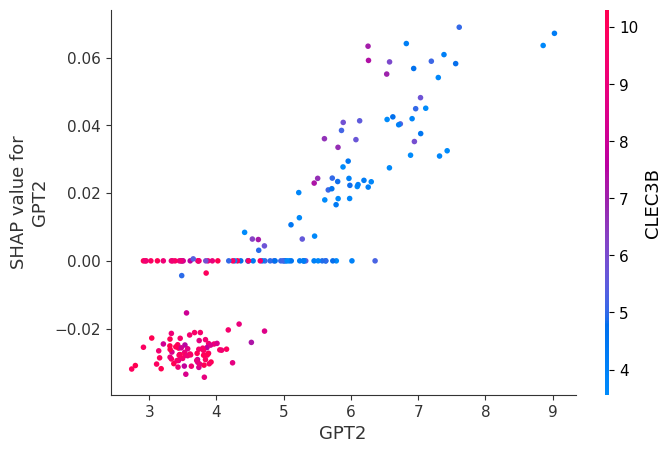

In [22]:
plt.figure(dpi=300)
shap.dependence_plot('GPT2',shap_values,X,show=False)
plt.savefig('SVM_GPT2.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

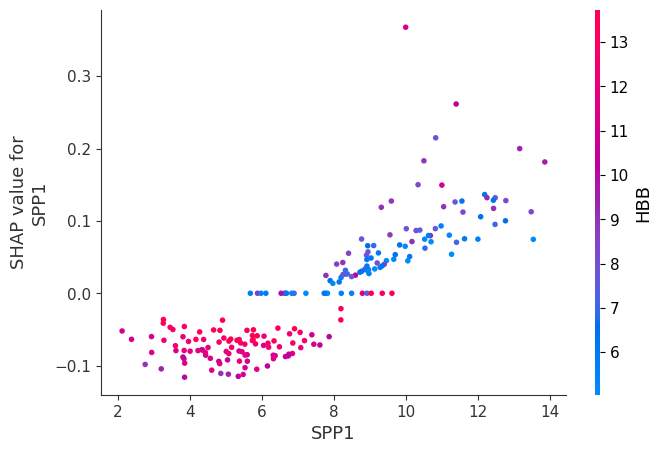

In [23]:
plt.figure(dpi=300)
shap.dependence_plot('SPP1',shap_values,X,show=False)
plt.savefig('SVM_SPP1.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

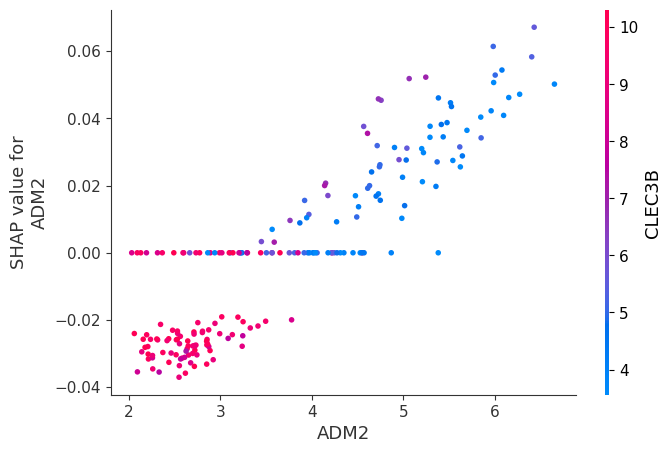

In [24]:
plt.figure(dpi=300)
shap.dependence_plot('ADM2',shap_values,X,show=False)
plt.savefig('SVM_ADM2.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

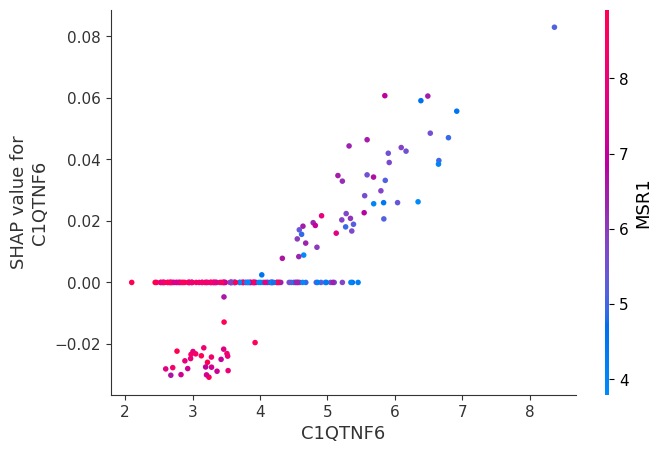

In [25]:
plt.figure(dpi=300)
shap.dependence_plot('C1QTNF6',shap_values,X,show=False)
plt.savefig('SVM_C1QTNF6.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

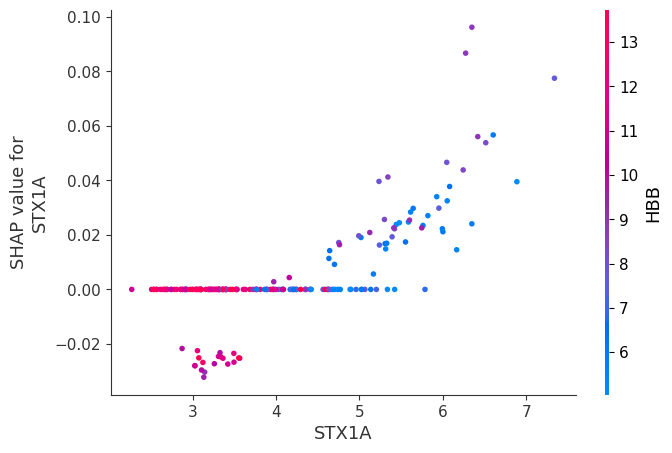

In [26]:
plt.figure(dpi=300)
shap.dependence_plot('STX1A',shap_values,X,show=False)
plt.savefig('SVM_STX1A.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

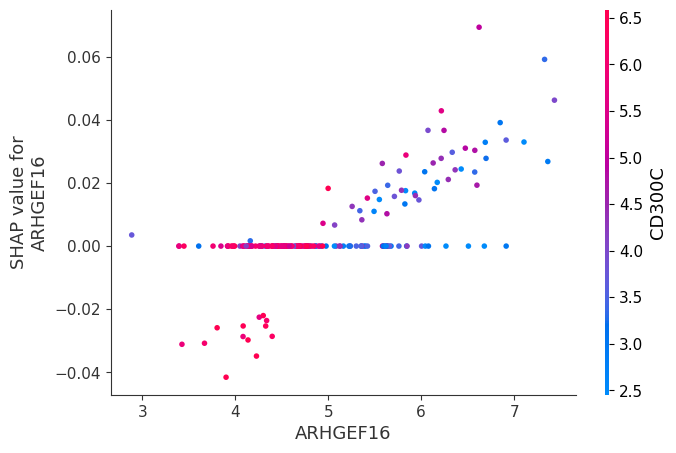

In [27]:
plt.figure(dpi=300)
shap.dependence_plot('ARHGEF16',shap_values,X,show=False)
plt.savefig('SVM_ARHGEF16.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

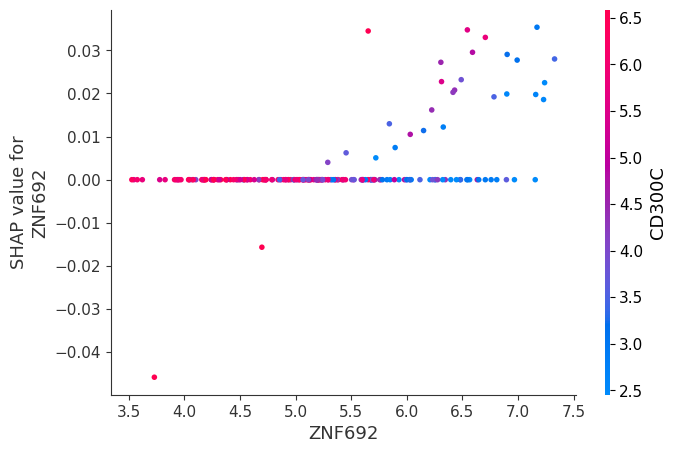

In [28]:
plt.figure(dpi=300)
shap.dependence_plot('ZNF692',shap_values,X,show=False)
plt.savefig('SVM_ZNF692.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

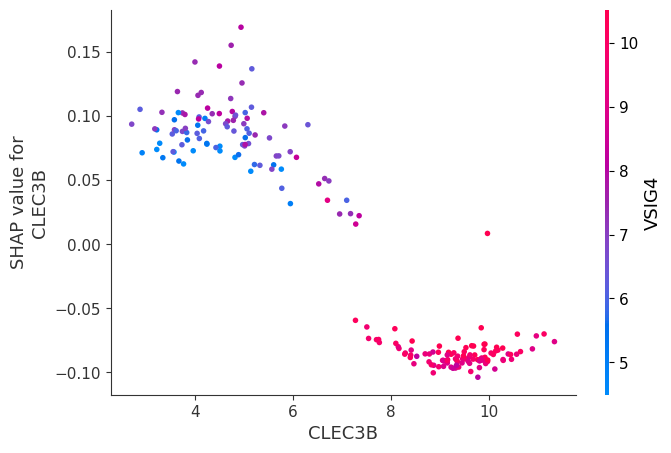

In [29]:
plt.figure(dpi=300)
shap.dependence_plot('CLEC3B',shap_values,X,show=False)
plt.savefig('SVM_CLEC3B.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

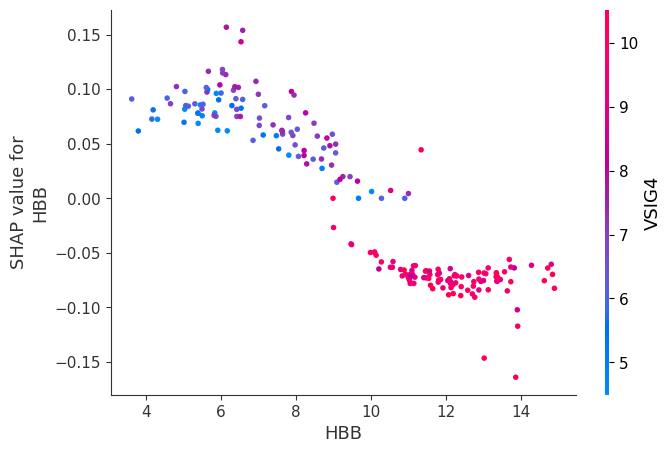

In [30]:
plt.figure(dpi=300)
shap.dependence_plot('HBB',shap_values,X,show=False)
plt.savefig('SVM_HBB.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

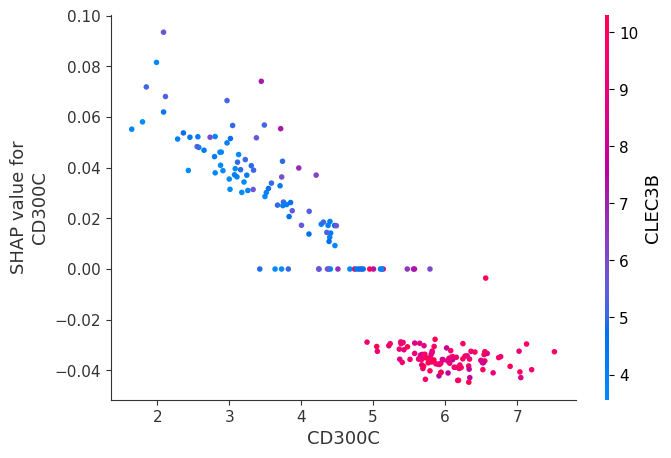

In [31]:
plt.figure(dpi=300)
shap.dependence_plot('CD300C',shap_values,X,show=False)
plt.savefig('SVM_CD300C.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

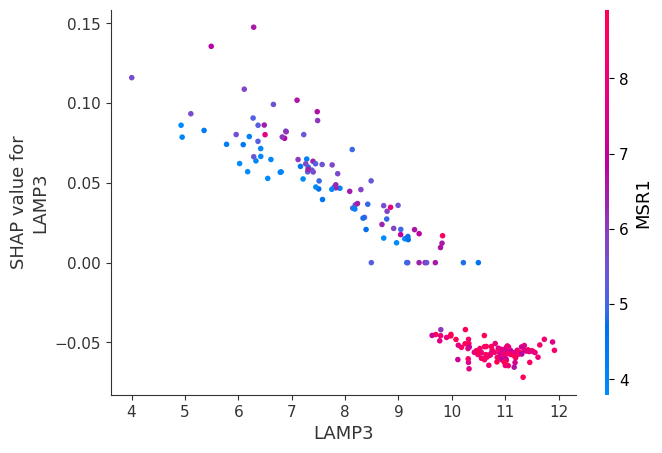

In [32]:
plt.figure(dpi=300)
shap.dependence_plot('LAMP3',shap_values,X,show=False)
plt.savefig('SVM_LAMP3.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

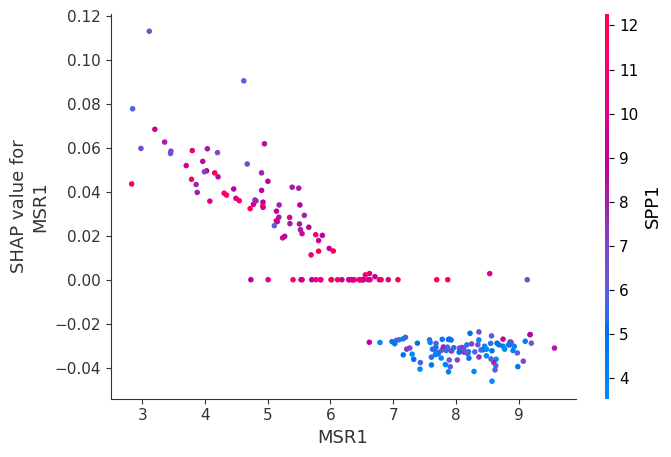

In [33]:
plt.figure(dpi=300)
shap.dependence_plot('MSR1',shap_values,X,show=False)
plt.savefig('SVM_MSR1.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

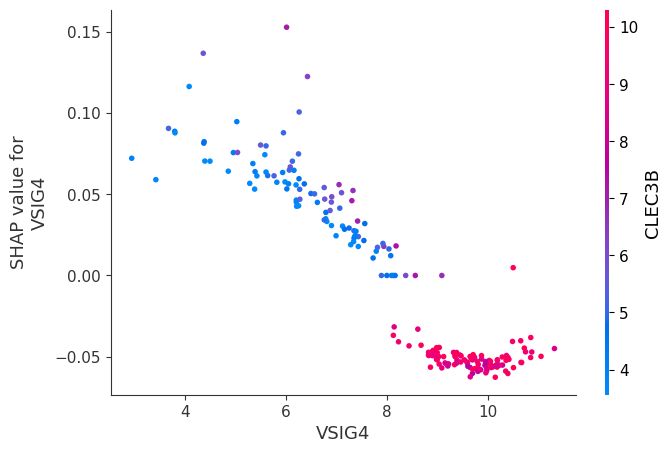

In [34]:
plt.figure(dpi=300)
shap.dependence_plot('VSIG4',shap_values,X,show=False)
plt.savefig('SVM_VSIG4.png',dpi=600,bbox_inches='tight')

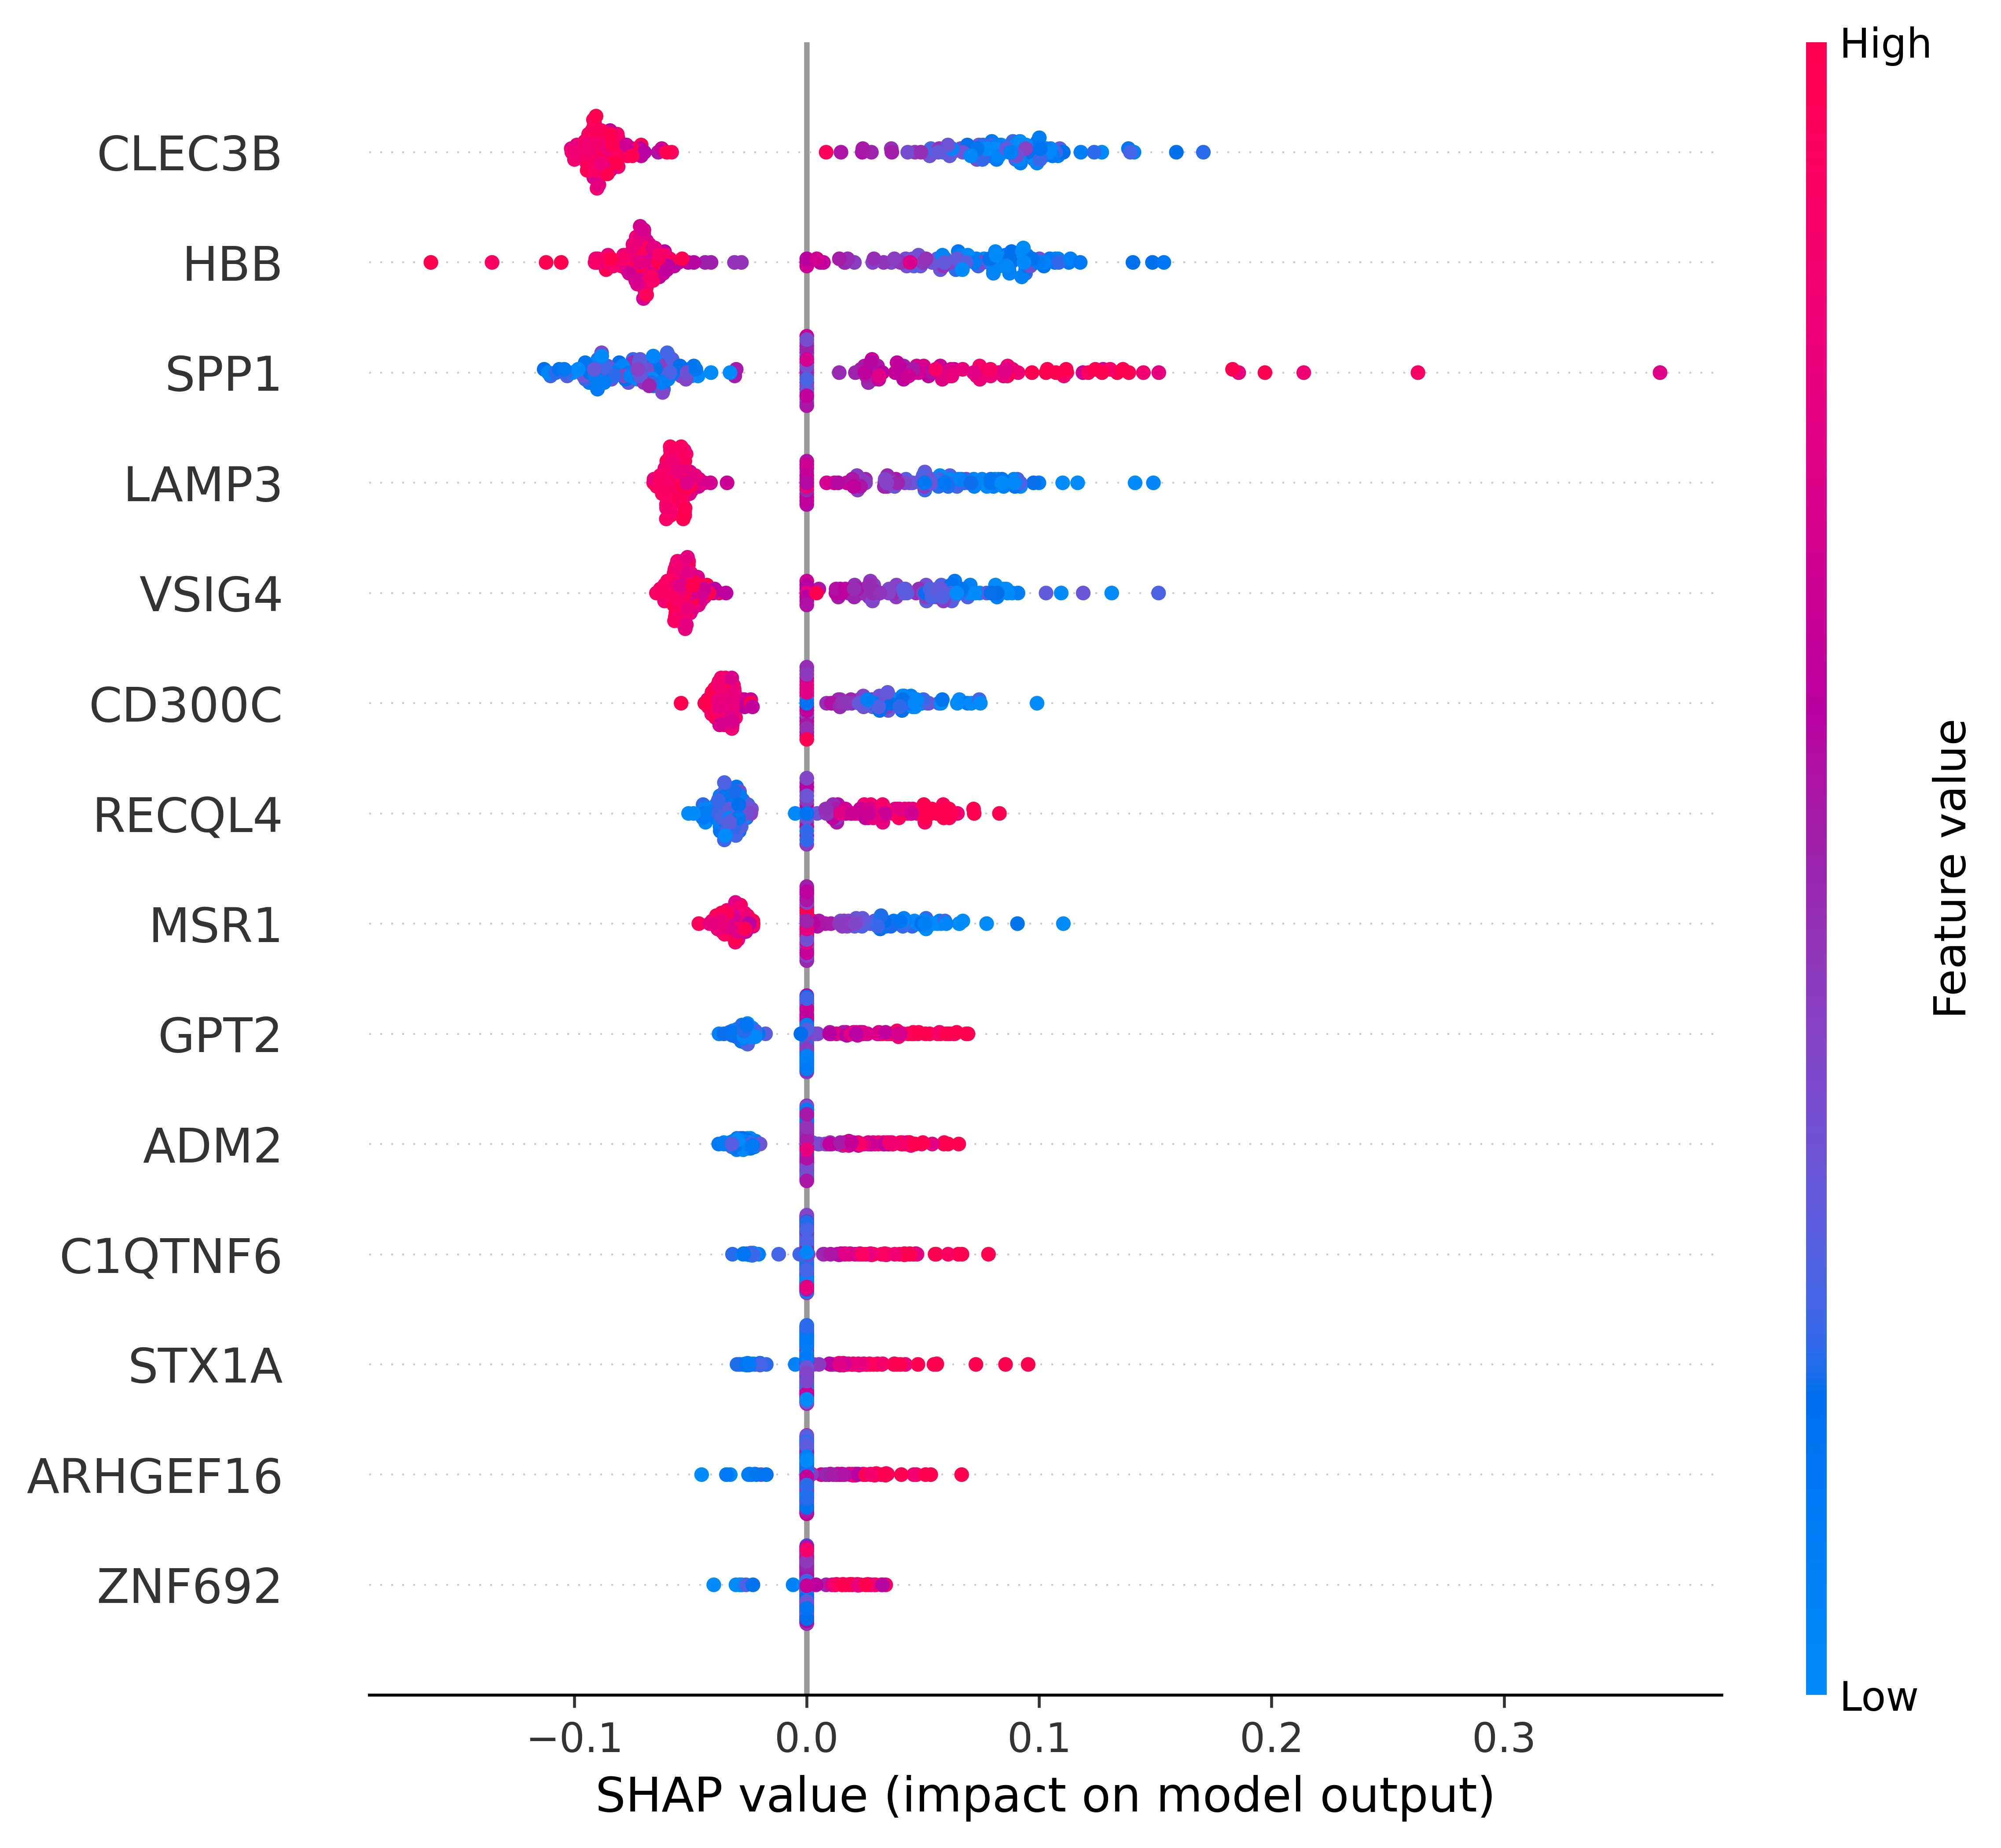

In [9]:
plt.figure(dpi=600)
shap.summary_plot(shap_values,X,show=False)
plt.savefig('SVM_importance.png')
plt.show()